### **DEEP LEARNING PARA PROCESSAMENTO DE LINGUAGEM E VISÃO [TURMA 01B] - 2022/1**
#### Trilha 2: Tarefa (Peso 3)

Nesta atividade, você deverá carregar os dados disponibilizados `OSI_feats_e3.csv`(entrada) e `OSI_feats_e2.csv` (Saída) combinando os seguintes passos:

```
1. Carregue os dados e divida-os em treinamento e teste. 
2. Crie um modelo sequencial. 
3. Adicione uma camada Dense com N neurônios, sendo N a quantidade de atributos. 
4. Adicione uma função de ativação sigmoide. 
5. Compile o modelo especificando o otimizador, a métrica de loss para avaliar, e quaisquer outras métricas para avaliar depois de cada época. 
6. Ajuste o modelo aos dados de treinamento, especificando o número de épocas. 
7. Apresente o loss e outras métricas para cada época que serão avaliadas nos conjuntos de treinamento/avaliação. 
8. Avalie o loss no conjunto de teste.
```

In [246]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [247]:
# Carregando os dados
df_feat = pd.read_csv("OSI_feats_e3.csv")
df_target = pd.read_csv('OSI_target_e2.csv')
dataset = pd.concat([df_feat,df_target],axis=1)
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_6,Region_7,Region_8,Region_9,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [248]:
# Dividindo em conjunto de treinamento e teste
X = dataset.drop('Revenue', axis=1)
y = dataset['Revenue']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [249]:
# Quantidade de atributos
qtd_attr = df_feat.shape[1]

In [250]:
# Criando o Modelo
model = keras.models.Sequential()
model.add(keras.layers.Dense(12, input_dim=qtd_attr, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 12)                828       
                                                                 
 dense_27 (Dense)            (None, 1)                 13        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [243]:
# Compilando o Modelo
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# Treinando o Modelo
EPOCH = 100
history = model.fit(x_train, y_train, epochs=EPOCH, validation_split=0.2)

Epoch 1/100
247/247 [==============================] - 1s 1ms/step - loss: 1.8864 - accuracy: 0.7415 - val_loss: 0.6327 - val_accuracy: 0.8738
Epoch 2/100
247/247 [==============================] - 0s 750us/step - loss: 0.4904 - accuracy: 0.8707 - val_loss: 0.4552 - val_accuracy: 0.8804
Epoch 3/100
247/247 [==============================] - 0s 714us/step - loss: 0.4236 - accuracy: 0.8768 - val_loss: 0.3698 - val_accuracy: 0.8829
Epoch 4/100
247/247 [==============================] - 0s 718us/step - loss: 0.4156 - accuracy: 0.8788 - val_loss: 0.3561 - val_accuracy: 0.8875
Epoch 5/100
247/247 [==============================] - 0s 815us/step - loss: 0.3851 - accuracy: 0.8768 - val_loss: 0.4414 - val_accuracy: 0.8773
Epoch 6/100
247/247 [==============================] - 0s 807us/step - loss: 0.3957 - accuracy: 0.8778 - val_loss: 0.4441 - val_accuracy: 0.8733
Epoch 7/100
247/247 [==============================] - 0s 839us/step - loss: 0.4271 - accuracy: 0.8743 - val_loss: 0.4074 - val_accu

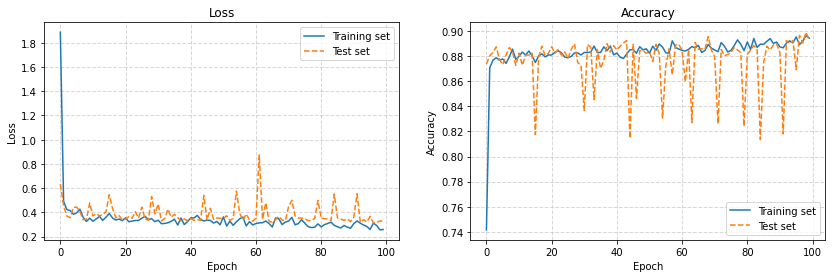

In [244]:
# Avaliação de Métricas
def viz_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']
    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

viz_history(history)

In [268]:
# Avaliação 
_, accuracy = model.evaluate(x_test,y_test)
print(f"Acurácia: {accuracy*100:.2f} %")

78/78 [==============================] - 0s 513us/step - loss: 0.2655 - accuracy: 0.8848
Acurácia: 88.48 %
